# Jupyter Notebooks for Frontier Science Reporting

## What problems can this address?

1.  While R is the preferred data analysis tool for Frontier both from a cost and a scientific standpoint, most of the staff do not have experience with it.  It is challenging to pick these skills up in the field given equipment and internet limitations.

2.  The process of creating science reports takes multiple weeks per quarter.  Some of that time is spent unnecessarily duplicating previous work.

3.  Scientific data analysis methods are not consistent across the marine projects and Frontier is missing opportunities to analyse long term trends.

4.  The staff consistently upload data to Google drive but it can be challenging for new PIs on the project or interns at HQ to understand how to use the data without instructions from the creator.

## What are the benefits?

1. This is a living document that is always online and accessible to field staff.  We keep building on the same document.

2. The means to creating the graphs and data analysis are right in the report (alongside the raw data) which facilitates collaboration between field staff and HQ; and we can take advantage of public data.

3. The instructions for R will be included making it easier for everyone on the science staff/interns to use R. Staff can help each other with R methods.

4. Reports can be published for the public in multiple formats (powerpoint, web pages, PDF and Word), and they can even be interactive.

5. Work is easy to reproduce, which will make data and reporting handovers easier.

## Example 1: Mapping Belize survey sites with NOAA bathymetry data

The Frontier Belize Marine project (BZM) was established in April 2014 within the Caye Caulker Forest and Marine Reserve (Figure 1). The Frontier Belize camp is located on the North island of Caye Caulker (CC) and hosts marine and coastal conservation volunteers. CC is a small limestone island located approximately 20 miles North-Northeast of Belize City at 17°44’33N 88°1’30W. 

** *Table 1.** SMP sites monitored by Frontier. The list includes conservation zone status, coral reef type and UTM coordinates.*

| Site_Name     | Site_Code | UTM_Zone | Easting | Northing | Long         | Lat         |
|---------------|-----------|----------|---------|----------|--------------|-------------|
| Corolitta     | PZC       | 16Q      | 391885  | 1967918  | -88.02006618 | 17.79607072 |
| Lobe City     | LOB       | 16Q      | 392017  | 1906365  | -88.01572198 | 17.23978271 |
| No-manns land | NML       | 16Q      | 392579  | 1906367  | -88.01043633 | 17.23982741 |
| Tap tap fish  | TTF       | 16Q      | 393822  | 1966286  | -88.00171038 | 17.78141602 |
| The Swash     | S         | 16Q      | 393927  | 1963507  | -88.00058017 | 17.75630596 |
| CCC Fore      | CCCFore   | 16Q      | 394079  | 1957698  | -87.99885562 | 17.70381439 |
| North Channel | NC        | 16Q      | 394424  | 1967918  | -87.99611337 | 17.79619413 |
| Raggedy Ann   | RA        | 16Q      | 394419  | 1959791  | -87.99575407 | 17.72274621 |
| Elkhorn Point | EP        | 16Q      | 394464  | 1968256  | -87.99575295 | 17.79925071 |
| Island        | I         | 16Q      | 394839  | 1966980  | -87.99215143 | 17.78773687 |





**This is the R code that will generate the graph

Skipping install of 'marmap' from a github remote, the SHA1 (afa9b64e) has not changed since last install.
  Use `force = TRUE` to force installation

Attaching package: 'marmap'

The following object is masked from 'package:grDevices':

    as.raster



Querying NOAA database ...
This may take seconds to minutes, depending on grid size
Building bathy matrix ...
Bathymetric data of class 'bathy', with 120 rows and 90 columns
Latitudinal range: 17.01 to 18.49 (17.01 N to 18.49 N)
Longitudinal range: -88.99 to -87.01 (88.99 W to 87.01 W)
Cell size: 1 minute(s)

Depth statistics:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4166.0 -1376.0    -2.0  -827.8    16.0   930.0 

First 5 columns and rows of the bathymetric matrix:


,17.0083333333333,17.025,17.0416666666667,17.0583333333333,17.075
-88.9916666666667,433,414,377,359,392
-88.975,477,457,434,405,398
-88.9583333333333,525,494,473,455,431
-88.9416666666667,559,527,508,501,439
-88.925,605,576,541,548,446


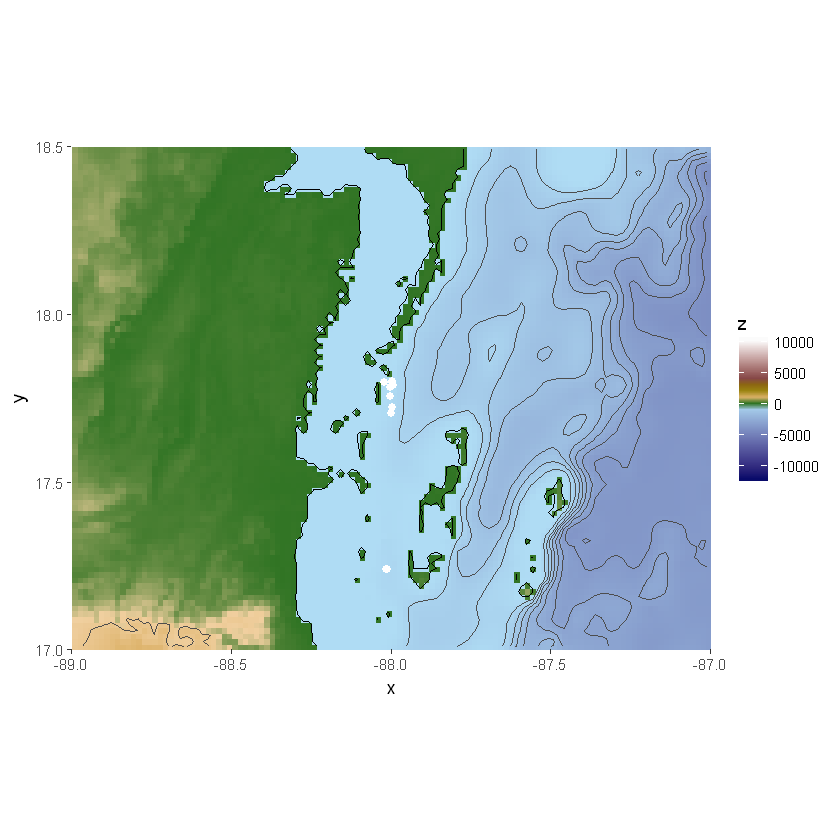

In [1]:
#loading the relevant R libraries
library(devtools)
install_github("ericpante/marmap")
library(ggplot2)
library(marmap)

#reading the data represented in Table 1
Coordinates <- read.csv("Coordinates.csv", header = TRUE)

#defining a zone that encompasses all of the sites and assigning it to the CCMR_map variable
CCMR_map <-getNOAA.bathy(lon1 = -87, lon2 = -89, lat1 = 17, lat2 = 18.5, resolution = 1)

#creating a map of the zone and assigning it to the CCMR_plot variable (so the graph can be manipulated later)
CCMR_plot <- autoplot(CCMR_map, geom=c("r","c")) + scale_fill_etopo()

#adding the coordinates to the map
CCMR_plot <- CCMR_plot + geom_point(aes(x = Coordinates$Long, y = Coordinates$Lat), data = Coordinates, color ='#ffffff',size=2)

#printing a summary of the area
summary(CCMR_map)

#printing map
CCMR_plot 

#adding labels to the map- this is unfinished. in future we can expand the code below to add conservation zones or other data 
#CCMR_plot + geom_text(x = Coordinates$Long, y =Coordinates$Lat, data= Coordinates, label=Coordinates$Site_Code, alpha=1)

## Example 2: Seagrass and fish composition in Tanzania

There were 5 different species of seagrass identified in our surveys; *Cymodecea serrulata* (CS), *Enhalus acoroides* (EA), *Syringodium isoetofolium* (SI), *Thassalia hempricii* (TH), and *Halodule uninervis* (HI).  Either *C. serrulata* or *E. acoroides* were the primarily dominant species in 28 out of the 39 transects.  Unique fish species per transect ranged from 1 to 18, with at least 1 species of fish observed in each survey.  Seagrass coverage and the related fish abundance and fish species diversity are plotted in Figure 1. The highest values for both fish abundance (205 individuals) and fish diversity (18 species) were found in Transect 14, which was dominated by *S. isoetofolium.*

Transect,Dominant_species,Pcnt_seagrass,Pcnt_EA,Pcnt_SI,Pcnt_TH,Pcnt_HU,Pcnt_CS,Pcnt_TC,Fish_species,Fish_abundance,Invert_species,Invert_abundance
25,CS,83.0,0,0,194,10,221,0,3,14,2,2
26,CS,72.0,0,15,0,5,340,0,5,42,4,5
24,CS,67.0,0,0,70,75,190,0,7,8,2,2
8,CS,65.0,115,0,0,0,210,0,9,19,2,4
34,CS,60.0,30,75,0,70,125,0,4,13,1,3
37,CS,51.4,65,85,0,12,95,0,5,15,7,19
35,CS,50.0,105,0,0,0,145,0,10,39,4,4
41,CS,50.0,65,45,0,0,140,0,5,19,4,7
23,CS,47.0,0,5,0,0,70,0,4,73,5,13
40,CS,41.0,50,0,0,0,155,0,9,85,3,10


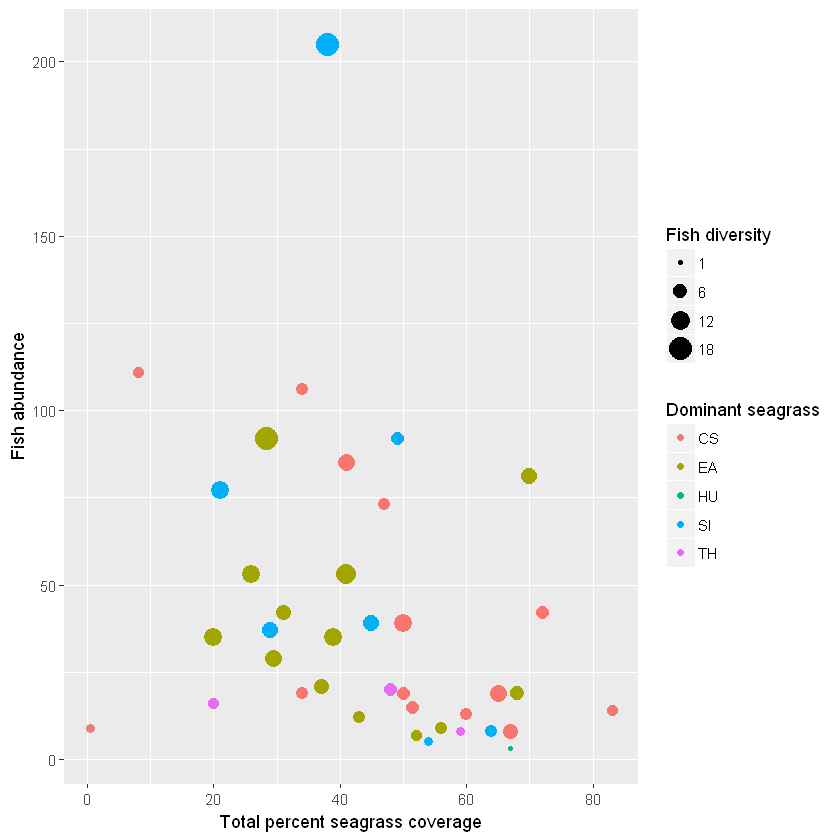

In [2]:
#reading the data (data can also be linked to the internet so collaborators know they are always working off the same set)
Seagrass <- read.csv("seagrass_data.csv", header = TRUE)

#showing the first few rows of seagrasss data
head(Seagrass, n=10)

#creating a bubble plot of seagrass coverage and fish abundance and assigning it to a variable which can be easily modififed
#plot also highlights which seagrass species support the most fish diversity using bubble size and bubble colour
Fish_seagrass_plot <- ggplot(Seagrass, aes(x=Seagrass$Pcnt_seagrass, y=Seagrass$Fish_abundance)) +
    geom_point(aes(col=Seagrass$Dominant_species, size=Seagrass$Fish_species))+
    xlab("Total percent seagrass coverage") + ylab("Fish abundance") +
    labs(size="Fish diversity", col="Dominant seagrass") + 
    scale_size_continuous(breaks=c(0,1,6,12,18))

Fish_seagrass_plot

**This is output from the R code above

*Figure 1. Plot of seagrass coverage, fish abundance and fish species diversity from snorkel surveys*

## What are the next steps?

1. Get sign off to trial a notebook report collaboraton with 1 project and HQ to investigate the feasibility of using this in the field
2. If that goes well, start standardising Frontier's field data format for reporting and R
3. Develop basic training materials (most of it will be in the notebooks themselves) and a process around quarterly reporting.
4. Decide on the appropriate method for publishing to the public 
    (i.e. - make code/data public or not?, create interactive webpages, continue with PDFs, etc.)




